In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

if '..' not in sys.path:
    sys.path.append('..')
from deep_utils import *
import pypan.ui as pan
from pypan.utils import *

%matplotlib inline

In [2]:
netlist = '../pan/two-area_overload.pan'
output_dir = os.path.splitext(os.path.split(netlist)[1])[0] + '.raw/'
ok,libs = pan.load_netlist(netlist)

In [3]:
LAMBDA = np.r_[0 : 2 : 0.01]
N = len(LAMBDA)
poles = []
for i,lam in enumerate(LAMBDA):
    pan.alter('Al', 'LAMBDA', lam, libs, invalidate=1)
    pan.DC(f'Dc{i+1}', libs=libs, nettype=1, print='yes', printnodes='yes',
           ireltol=1e-3, vreltol=1e-3)
    pi = pan.PZ(f'Pz{i+1}', mem_vars=['poles'], libs=libs, nettype=1)
    poles.append(np.sort(pi.squeeze()))
poles = np.array(poles)

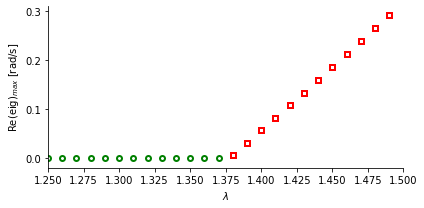

In [4]:
fig,ax = plt.subplots(1, 1, figsize=(6,3))
for i,l in enumerate(LAMBDA):
    col = 'r' if np.real(poles[i][-1]) > 1e-6 else 'g'
    mark = 'o' if np.isreal(poles[i][-1]) else 's'
    ax.plot(l, np.real(poles[i][-1]), col + mark, markerfacecolor='w', markersize=5, markeredgewidth=2)
for side in 'right','top':
    ax.spines[side].set_visible(False)
ax.set_yticks(np.r_[0:.32:.1])
ax.set_xticks(np.r_[1.25:1.55:.025])
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel(r'$\mathrm{Re}(\mathrm{eig})_{max}$ [rad/s]')
ax.set_xlim([1.25, 1.50])
ax.set_ylim([-0.02, 0.31])
fig.tight_layout()
for ext in 'pdf','png':
    fig.savefig(f'area_2_overload.{ext}')